# Face recognition

src :
https://github.com/ageitgey/face_recognition

In [ ]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ee80f95d81f3a11a551e78454d5fb64e09038912e530a4b7f0397957cb5e252d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Membuat "known" dan "unknown" direktori

In [ ]:
!mkdir known unknown

Direktori "known" akan digunakan sebagai tempat menyimpan basemodel sebagai acuan untuk foto yang nantinya akan kita deteksi dari direktori "unknown"


In [ ]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition

In [21]:
def draw_rec(url1, url2, url3):
  # This is an example of running face recognition on a single image
  # and drawing a box around each person that was identified.

  # Load a sample picture and learn how to recognize it.
  obama_image = face_recognition.load_image_file(url1)
  obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

  # Load a second sample picture and learn how to recognize it.
  biden_image = face_recognition.load_image_file(url2)
  biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

  # Create arrays of known face encodings and their names
  known_face_encodings = [
      obama_face_encoding,
      biden_face_encoding
  ]
  known_face_names = [
      "Known",
      "Known"
  ]

  # Load an image with an unknown face
  unknown_image = face_recognition.load_image_file(url3)

  # Find all the faces and face encodings in the unknown image
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

  # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
  # See http://pillow.readthedocs.io/ for more about PIL/Pillow
  pil_image = Image.fromarray(unknown_image)
  # Create a Pillow ImageDraw Draw instance to draw with
  draw = ImageDraw.Draw(pil_image)

  # Loop through each face found in the unknown image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      # See if the face is a match for the known face(s)
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

      name = "Unknown"

      # If a match was found in known_face_encodings, just use the first one.
      if True in matches:
          first_match_index = matches.index(True)
          name = known_face_names[first_match_index]

      # Draw a box around the face using the Pillow module
      draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

      # Draw a label with a name below the face
      text_width, text_height = draw.textsize(name)
      draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
      draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


  # Remove the drawing library from memory as per the Pillow docs
  del draw

  # Display the resulting image
  plt.imshow(pil_image, aspect='auto')

  # You can also save a copy of the new image to disk if you want by uncommenting this line
  pil_image.save("image_with_boxes.jpg")

Fungsi `draw_rec(url1, url2, url3)` memiliki beberapa langkah utama:

1. Memuat gambar wajah yang diketahui (url1 dan url2) dan menghasilkan vektor representasi wajah menggunakan fungsi `face_recognition.face_encodings()`.
2. Menyimpan vektor representasi wajah yang diketahui dan nama mereka dalam array `known_face_encodings` dan `known_face_names`.
3. Memuat gambar wajah yang tidak diketahui (url3) dan mengidentifikasi lokasi dan vektor representasi wajah menggunakan fungsi `face_recognition.face_locations()` dan `face_recognition.face_encodings()`.
4. Mengonversi gambar menjadi objek PIL menggunakan `Image.fromarray()` dan membuat objek `ImageDraw.Draw` untuk menggambar di atas gambar.
5. Untuk setiap wajah yang ditemukan, membandingkan dengan wajah yang diketahui menggunakan `face_recognition.compare_faces()`. Jika ada kecocokan, nama orang yang dikenali ditentukan. Jika tidak ada kecocokan, wajah akan diberi label "Unknown".
6. Menggambar kotak persegi panjang di sekitar setiap wajah menggunakan `draw.rectangle()`.
7. Menampilkan nama di bawah setiap wajah dengan menggunakan `draw.text()` dan `draw.rectangle()`.
8. Menampilkan gambar yang telah diedit dengan `plt.imshow()`.
9. Opsional: Menyimpan gambar dengan kotak dan label menggunakan `pil_image.save()`.

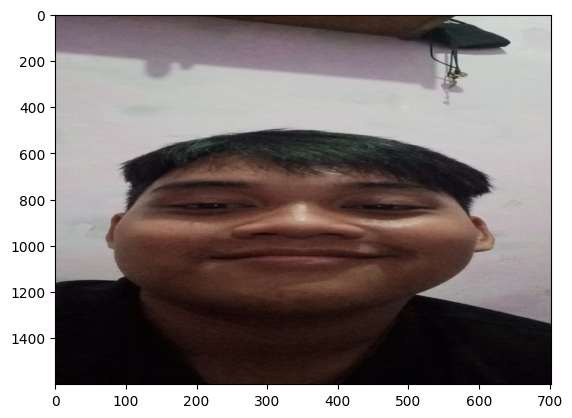

In [22]:
plt.imshow(Image.fromarray(face_recognition.load_image_file("unknown/siapaini.jpeg")), aspect='auto')

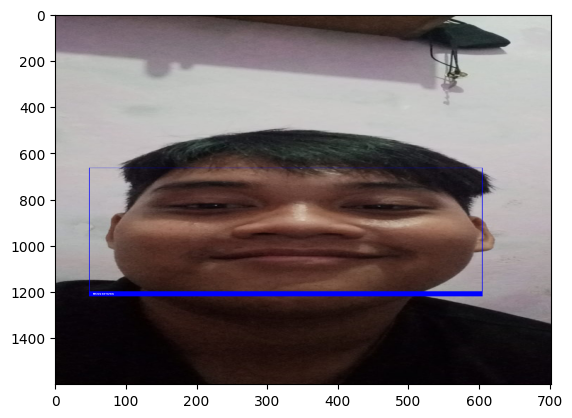

In [25]:
draw_rec("known/nugrahaas.jpeg", "known/ramean.jpeg", "unknown/siapaini.jpeg")